In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [3]:
iris = sns.load_dataset('iris')
iris.groupby(iris.species).describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [4]:
iris.groupby(iris.species).agg(['mean', 'std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

In [5]:
def get_new_stat(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    higher = q3 + 1.5 * iqr
    x[(x > higher) | (x < lower)] = np.nan
    #outlier = x.value_counts().sum() != 50
    outlier = x.isnull().sum() != 0     # 이 코드가 윗줄보다 좋아 보임
    return outlier, x.mean(), x.std()

In [6]:
s_sl = iris[iris.species == 'setosa']['sepal_length']
type(s_sl)

pandas.core.series.Series

In [7]:
species = []; items = []
old_mean_list = []; old_std_list = []
for spec in ['setosa', 'versicolor', 'virginica']:
    for wl in ['sepal_length','sepal_width','petal_length','petal_width']:
        s = iris[iris.species == spec][wl]
        #print(f'{spec} {wl}: {s.mean().round(3)}, {s.std().round(3)}')
        species.append(spec); items.append(wl)
        old_mean_list.append(s.mean())
        old_std_list.append(s.std())

In [8]:
tmp_iris = pd.DataFrame({
    'species': species,
    'items': items,
    'old_mean': old_mean_list,
    'old_std': old_std_list
})
new_iris = tmp_iris.set_index(['species', 'items'])
new_iris

old_mean   old_std
species    items                           
setosa     sepal_length     5.006  0.352490
           sepal_width      3.428  0.379064
           petal_length     1.462  0.173664
           petal_width      0.246  0.105386
versicolor sepal_length     5.936  0.516171
           sepal_width      2.770  0.313798
           petal_length     4.260  0.469911
           petal_width      1.326  0.197753
virginica  sepal_length     6.588  0.635880
           sepal_width      2.974  0.322497
           petal_length     5.552  0.551895
           petal_width      2.026  0.274650

In [17]:
def get_new_stat(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    higher = q3 + 1.5 * iqr
    x[(x > higher) | (x < lower)] = np.nan
    #outlier = x.value_counts().sum() != 50
    outlier = x.isnull().sum() != 0     # 이 코드가 윗줄보다 좋아 보임
    print(x.isnull().sum())
    # print(x.tolist())
    # print(lower, higher)
    return outlier, x.mean(), x.std()

outlier_list = []; mean_list = []; std_list = []
for spec in ['setosa', 'versicolor', 'virginica']:
    if spec not in 'setosa':
        continue
    for wl in ['sepal_length','sepal_width','petal_length','petal_width']:
        s = iris[iris.species == spec][wl]

        if wl not in 'sepal_width':
            continue

        # print()
        # print(spec, wl)
        # print(s)
        outlier, new_mean, new_std = get_new_stat(s)

        # print()
        # print(spec)
        # print(wl)
        # print(outlier, new_mean, new_std)
        # print(f'{spec} {wl}: {outlier}, {new_mean.round(3)}, {new_std.round(3)}')    
        # outlier_list.append(outlier)
        # mean_list.append(new_mean); std_list.append(new_std)

2


In [10]:
new_iris['outlier'] = outlier_list
new_iris['new_mean'] = mean_list
new_iris['new_std'] = std_list
new_iris

ValueError: Length of values does not match length of index

In [11]:
pd.options.display.float_format = lambda new_iris: f'{new_iris:.3f}'
new_iris

old_mean  old_std  outlier  new_mean  new_std
species    items                                                      
setosa     sepal_length     5.006    0.352    False     5.006    0.352
           sepal_width      3.428    0.379     True     3.431    0.320
           petal_length     1.462    0.174     True     1.461    0.129
           petal_width      0.246    0.105     True     0.233    0.086
versicolor sepal_length     5.936    0.516    False     5.936    0.516
           sepal_width      2.770    0.314    False     2.770    0.314
           petal_length     4.260    0.470     True     4.286    0.438
           petal_width      1.326    0.198    False     1.326    0.198
virginica  sepal_length     6.588    0.636     True     6.622    0.593
           sepal_width      2.974    0.322     True     2.955    0.260
           petal_length     5.552    0.552    False     5.552    0.552
           petal_width      2.026    0.275    False     2.026    0.275

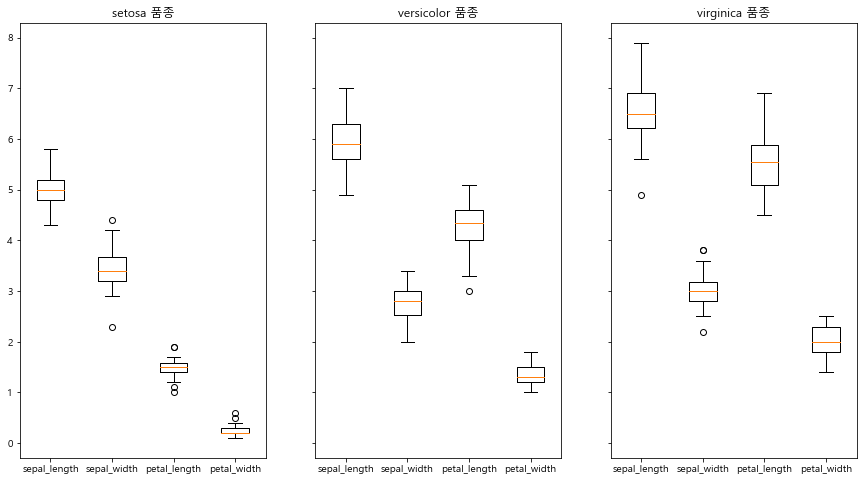

In [12]:
# 그래프로 확인
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,8), sharey=True)
for i, spec in enumerate(['setosa', 'versicolor', 'virginica']):
    ax = axs[i]
    sl = iris[iris.species == spec].sepal_length
    sw = iris[iris.species == spec].sepal_width
    pl = iris[iris.species == spec].petal_length
    pw = iris[iris.species == spec].petal_width
    ax.boxplot((sl, sw, pl, pw), 
        labels=['sepal_length', 'sepal_width', 'petal_length','petal_width'])
    ax.set_title(f'{spec} 품종')

plt.show()